In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('train-chennai-sale.csv')
df

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,P03834,Karapakkam,598,03-01-2011,51,1.0,1.0,2,AdjLand,No,...,ELO,No Access,RM,3.0,2.2,2.4,2.520,208767,107060,5353000
7105,P10000,Velachery,1897,08-04-2004,52,3.0,2.0,5,Family,Yes,...,NoSeWa,No Access,RH,3.6,4.5,3.3,3.920,346191,205551,10818480
7106,P09594,Velachery,1614,25-08-2006,152,2.0,1.0,4,Normal Sale,No,...,NoSeWa,Gravel,I,4.3,4.2,2.9,3.840,317354,167028,8351410
7107,P06508,Karapakkam,787,03-08-2009,40,1.0,1.0,2,Partial,Yes,...,ELO,Paved,RL,4.6,3.8,4.1,4.160,425350,119098,8507000


In [3]:
df.drop(['PRT_ID'],axis = 1,inplace = True)
df.head()

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,15-05-1967,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,22-12-1995,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,09-02-1992,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,18-03-1988,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,13-10-1979,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


In [4]:
df.columns

Index(['AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE', 'COMMIS',
       'SALES_PRICE'],
      dtype='object')

#@ Working AREA column

In [5]:
df['AREA'].isna().sum()  #There are no null values in 'AREA' column.

0

In [6]:
df['AREA'].value_counts()

Chrompet      1681
Karapakkam    1363
KK Nagar       996
Velachery      979
Anna Nagar     783
Adyar          773
T Nagar        496
Chrompt          9
Chrmpet          6
Chormpet         6
TNagar           5
Karapakam        3
Ana Nagar        3
Velchery         2
Ann Nagar        2
Adyr             1
KKNagar          1
Name: AREA, dtype: int64

In [7]:
df['AREA'].values 

array(['Karapakkam', 'Anna Nagar', 'Adyar', ..., 'Velachery',
       'Karapakkam', 'Velachery'], dtype=object)

In [8]:
df['AREA'].unique()
#Here we can see that same area name is repeated with spelling mistakes.

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KK Nagar', 'TNagar', 'T Nagar', 'Chrompt', 'Chrmpet', 'Karapakam',
       'Ana Nagar', 'Chormpet', 'Adyr', 'Velchery', 'Ann Nagar',
       'KKNagar'], dtype=object)

In [9]:
df['AREA'] = df['AREA'].replace({'TNagar':'T Nagar','Chrompt':'Chrompet','Chrmpet':'Chrompet','Karapakam':'Karapakkam','Ana Nagar':'Anna Nagar','Chormpet':'Chrompet','Adyr':'Adyar','Velchery':'Velachery','Ann Nagar':'Anna Nagar','KKNagar':'KK Nagar'})

In [10]:
# WE have replaced the duplicate area names to original area names, lets see what are the unique areas we have.
df['AREA'].unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KK Nagar', 'T Nagar'], dtype=object)

<function matplotlib.pyplot.show>

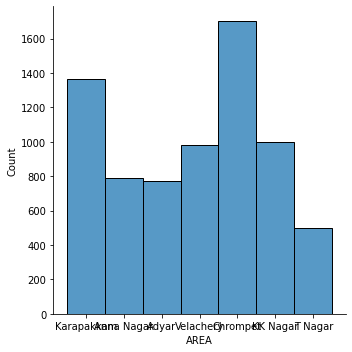

In [11]:
#Ploting distribution of feature="AREA" plot
sns.displot(df['AREA'])
plt.show

'\nTHESE IS THE PLOT WHICH SHOW US, IN WHICH AREA MORE NUMBER OF SALES HAVE DONE.\n'

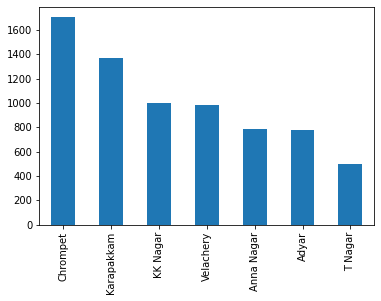

In [12]:
df['AREA'].value_counts().plot.bar()   
"""
THESE IS THE PLOT WHICH SHOW US, IN WHICH AREA MORE NUMBER OF SALES HAVE DONE.
"""

'\nThere is a linear relationship btw "AREA" and "SALES_PRICE".\nwe can label encode the "AREA" feature.\n'

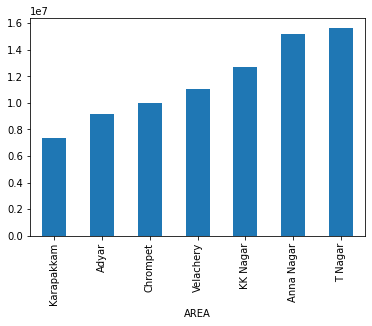

In [13]:
#let's if there is a relationship btw 'AREA' and price of the house.
df.groupby('AREA')['SALES_PRICE'].mean().sort_values(ascending=True).plot.bar()


#we can see a linear relationship btw "AREA" and "SALES_PRICE".
"""
There is a linear relationship btw "AREA" and "SALES_PRICE".
we can label encode the "AREA" feature.
"""

In [14]:
#lets give values to areas orderly according to avg sales price to that area
area = {'Karapakkam':0,'Adyar':1,'Chrompet':2,'Velachery':3,'KK Nagar':4,'Anna Nagar':5,'T Nagar':6}

In [15]:
df['AREA'] = df['AREA'].replace(area)

In [16]:
df.columns

Index(['AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE', 'COMMIS',
       'SALES_PRICE'],
      dtype='object')

#@ working on "INT_SQFT" column

In [17]:
df['INT_SQFT'].values

array([1004, 1986,  909, ..., 1614,  787, 1896])

In [18]:
df['INT_SQFT'].isna().sum()  
#There are no null values in 'INT_SQFT' column

0

In [19]:
#let's check for outliers in this column
df['INT_SQFT'].describe()

count    7109.000000
mean     1382.073006
std       457.410902
min       500.000000
25%       993.000000
50%      1373.000000
75%      1744.000000
max      2500.000000
Name: INT_SQFT, dtype: float64

In [20]:
q3 = df['INT_SQFT'].quantile(0.75)
q1 = df['INT_SQFT'].quantile(0.25)
iqr = q3 - q1
iqr

751.0

In [21]:
q3 + 1.5*iqr
# There is no value greater than '2870.5' in column

2870.5

In [22]:
q1 - 1.5*iqr
# There is no such value which is greater than '-133.5' in this column

-133.5

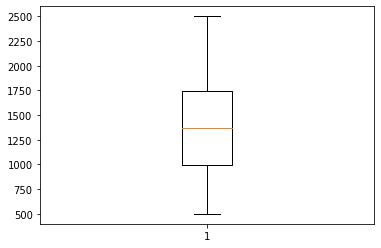

In [23]:
#checking with box plot
plt.boxplot(df['INT_SQFT'])
plt.show()

In [24]:
"""
THERE ARE NO OUTLIERS IN COLUMN 'INT_SQFT'
"""

"\nTHERE ARE NO OUTLIERS IN COLUMN 'INT_SQFT'\n"

<function matplotlib.pyplot.show>

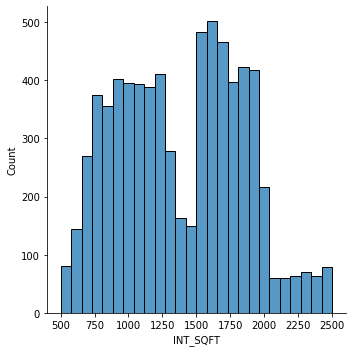

In [25]:
#Ploting distribution of feature="INT_SQFT" plot
sns.displot(df['INT_SQFT'])
plt.show

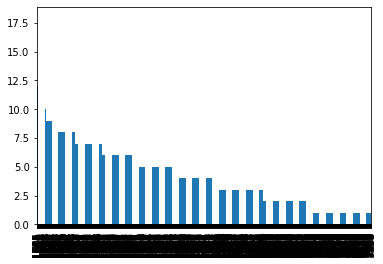

In [26]:
df['INT_SQFT'].value_counts().plot.bar()   


"\nThere may not be clear linear relationship btw 'INT_SQFT' and 'SALES_PRICE' ,but we can say that there is a positive correaltion btw these two columns\n"

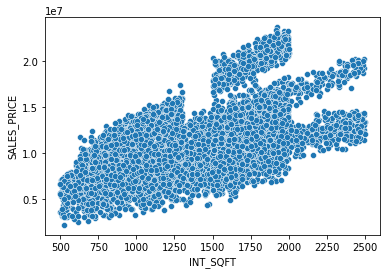

In [27]:
sns.scatterplot(x = 'INT_SQFT',
                y = 'SALES_PRICE',
                data = df[['INT_SQFT','SALES_PRICE']])

"""
There may not be clear linear relationship btw 'INT_SQFT' and 'SALES_PRICE' ,but we can say that there is a positive correaltion btw these two columns
"""

In [28]:
df[['INT_SQFT','SALES_PRICE']].corr()

#Here we can see that there is a significant correlation btw 'INT_SQFT' and 'SALES_PRICE'.

,INT_SQFT,SALES_PRICE
INT_SQFT,1.000000,0.612125
SALES_PRICE,0.612125,1.000000


#@ Date_sale

In [29]:
df['DATE_SALE'].values

array(['04-05-2011', '19-12-2006', '04-02-2012', ..., '25-08-2006',
       '03-08-2009', '13-07-2005'], dtype=object)

In [30]:
df['DATE_SALE'].dtype  #It is object data type.

dtype('O')

In [31]:
df['DATE_SALE'] = pd.to_datetime(df['DATE_SALE'])

In [32]:
df['DATE_SALE'].dtype  #Now it has converted into date time format.

dtype('<M8[ns]')

In [33]:
df['SALE_YEAR'] = pd.DatetimeIndex(df['DATE_SALE']).year

In [34]:
df['SALE_YEAR'].value_counts()

2010    1341
2011    1300
2009    1122
2008     814
2012     654
2007     651
2013     365
2014     335
2006     253
2004     116
2005     107
2015      51
Name: SALE_YEAR, dtype: int64

<function matplotlib.pyplot.show>

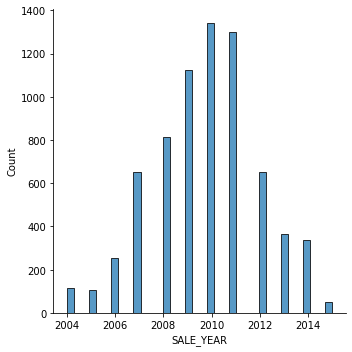

In [35]:
#Ploting distribution of feature="SALE_YEAR" plot
sns.displot(df['SALE_YEAR'])
plt.show   

#2010 is the year which have most number of sales

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   AREA           7109 non-null   int64         
 1   INT_SQFT       7109 non-null   int64         
 2   DATE_SALE      7109 non-null   datetime64[ns]
 3   DIST_MAINROAD  7109 non-null   int64         
 4   N_BEDROOM      7108 non-null   float64       
 5   N_BATHROOM     7104 non-null   float64       
 6   N_ROOM         7109 non-null   int64         
 7   SALE_COND      7109 non-null   object        
 8   PARK_FACIL     7109 non-null   object        
 9   DATE_BUILD     7109 non-null   object        
 10  BUILDTYPE      7109 non-null   object        
 11  UTILITY_AVAIL  7109 non-null   object        
 12  STREET         7109 non-null   object        
 13  MZZONE         7109 non-null   object        
 14  QS_ROOMS       7109 non-null   float64       
 15  QS_BATHROOM    7109 n

In [37]:
df['SALE_YEAR'].isna().sum() # There are no null values in SALE_YEAR

0

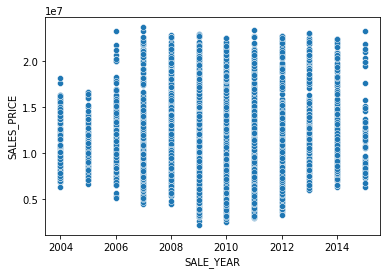

In [38]:
sns.scatterplot(x = 'SALE_YEAR',
                y = 'SALES_PRICE',
                data = df[['SALE_YEAR','SALES_PRICE']])

#@ DIST_MAINROAD column

In [39]:
df['DIST_MAINROAD'].values

array([131,  26,  70, ..., 152,  40, 156])

In [40]:
df['DIST_MAINROAD'].isna().sum()  #There are no null values in 'DIST_MAINROAD' column

0

In [41]:
df['DIST_MAINROAD'].dtype

dtype('int64')

In [42]:
#let's check for outliers in this column
df['DIST_MAINROAD'].describe()

count    7109.000000
mean       99.603179
std        57.403110
min         0.000000
25%        50.000000
50%        99.000000
75%       148.000000
max       200.000000
Name: DIST_MAINROAD, dtype: float64

In [43]:
q3 = df['DIST_MAINROAD'].quantile(0.75)
q1 = df['DIST_MAINROAD'].quantile(0.25)
iqr = q3 - q1
iqr

98.0

In [44]:
q3 + 1.5*q3 #There is no value greater than '370.0'

370.0

In [45]:
q1 - 1.5*iqr #There is no value less than '-97.0'

-97.0

In [46]:
"""
There are no outliers in 'DIST_MAINROAD' column
"""

"\nThere are no outliers in 'DIST_MAINROAD' column\n"

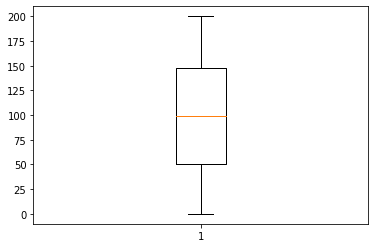

In [47]:
#checking with box plot
plt.boxplot(df['DIST_MAINROAD'])
plt.show()

<function matplotlib.pyplot.show>

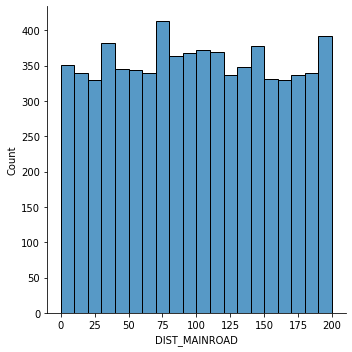

In [48]:
#Ploting distribution of feature="DIST_MAINROAD" plot
sns.displot(df['DIST_MAINROAD'])
plt.show

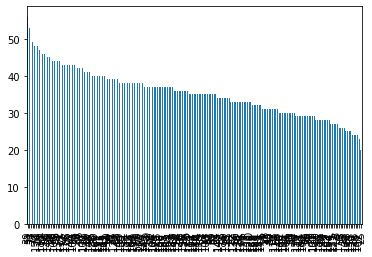

In [49]:
df['DIST_MAINROAD'].value_counts().plot.bar() 

"\nThere is no clear relationship btw 'DIST_MAINROAD' and 'SALES_PRICE'\n"

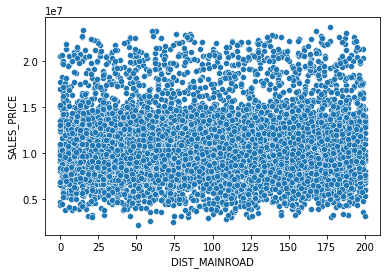

In [50]:
sns.scatterplot(x = 'DIST_MAINROAD',
                y = 'SALES_PRICE',
                data = df[['DIST_MAINROAD','SALES_PRICE']])
"""
There is no clear relationship btw 'DIST_MAINROAD' and 'SALES_PRICE'
"""

In [51]:
df[['DIST_MAINROAD','SALES_PRICE']].corr()
"""
There is not much correlation between 'Distance from main road' and 'sales price of house'
"""

"\nThere is not much correlation between 'Distance from main road' and 'sales price of house'\n"

In [52]:
"""
we can drop this columnn if it has no significant relation for prediction of the sale price of the house.
"""

'\nwe can drop this columnn if it has no significant relation for prediction of the sale price of the house.\n'

#@ N_BEDROOM

In [53]:
df['N_BEDROOM'].values

array([1., 2., 1., ..., 2., 1., 3.])

In [54]:
df['N_BEDROOM'].isna().sum()

1

In [55]:
df['N_BEDROOM'].describe()

count    7108.000000
mean        1.637029
std         0.802902
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         4.000000
Name: N_BEDROOM, dtype: float64

In [56]:
df['N_BEDROOM'].fillna(int(df['N_BEDROOM'].mode()),inplace=True)

In [57]:
df['N_BEDROOM'] = df['N_BEDROOM'].astype(int)

In [58]:
df['N_BEDROOM'].isna().sum()

0

In [59]:
df['N_BEDROOM'].value_counts()

1    3796
2    2352
3     707
4     254
Name: N_BEDROOM, dtype: int64

<function matplotlib.pyplot.show>

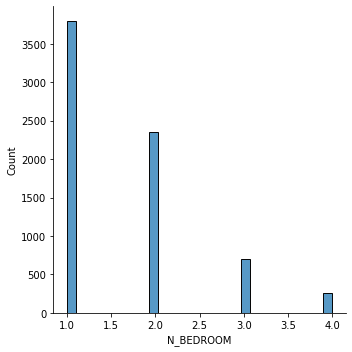

In [60]:
#Ploting distribution of feature="N_BEDROOM" plot
sns.displot(df['N_BEDROOM'])
plt.show

#Here we can see that 1 bedroom flats are sold more number of times.

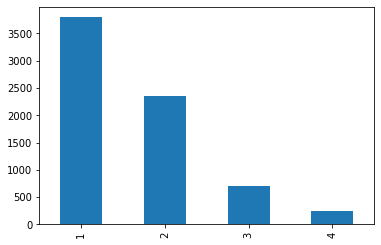

In [61]:
df['N_BEDROOM'].value_counts().plot.bar() 

#It shows the same data but with bar graph.

'\nHere we can clearly see that, there is an increase in price as we increase the number of bedrooms.\n'

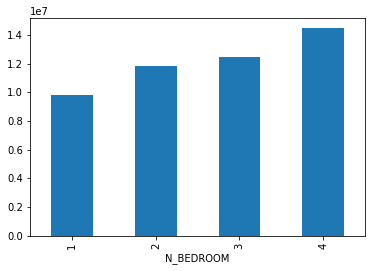

In [62]:
#let's if there is a relationship btw 'N_BEDROOM' and price of the house.
df.groupby('N_BEDROOM')['SALES_PRICE'].mean().sort_values(ascending=True).plot.bar()

"""
Here we can clearly see that, there is an increase in price as we increase the number of bedrooms.
"""

#@ N_BATHROOM

In [63]:
df['N_BATHROOM'].values

array([1., 1., 1., ..., 1., 1., 2.])

In [64]:
df['N_BATHROOM'].isna().sum()

5

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   AREA           7109 non-null   int64         
 1   INT_SQFT       7109 non-null   int64         
 2   DATE_SALE      7109 non-null   datetime64[ns]
 3   DIST_MAINROAD  7109 non-null   int64         
 4   N_BEDROOM      7109 non-null   int64         
 5   N_BATHROOM     7104 non-null   float64       
 6   N_ROOM         7109 non-null   int64         
 7   SALE_COND      7109 non-null   object        
 8   PARK_FACIL     7109 non-null   object        
 9   DATE_BUILD     7109 non-null   object        
 10  BUILDTYPE      7109 non-null   object        
 11  UTILITY_AVAIL  7109 non-null   object        
 12  STREET         7109 non-null   object        
 13  MZZONE         7109 non-null   object        
 14  QS_ROOMS       7109 non-null   float64       
 15  QS_BATHROOM    7109 n

In [66]:
df['N_BATHROOM'].fillna(int(df['N_BATHROOM'].mode()),inplace=True)

In [67]:
df['N_BATHROOM'] = df['N_BATHROOM'].astype(int)

In [68]:
df['N_BATHROOM'].isna().sum()  #There are no null values in number of bathrooms colummns.

0

In [69]:
df['N_BATHROOM'].value_counts()

1    5594
2    1515
Name: N_BATHROOM, dtype: int64

<function matplotlib.pyplot.show>

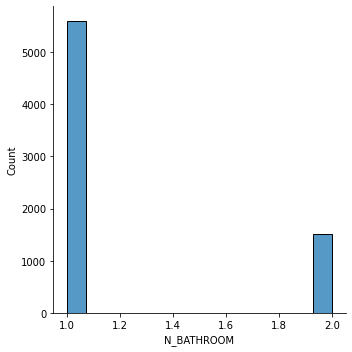

In [70]:
#Ploting distribution of feature="N_BATHROOM" plot
sns.displot(df['N_BATHROOM'])
plt.show 

#Here we can see that 1 bathroom houses sold more number number of times.

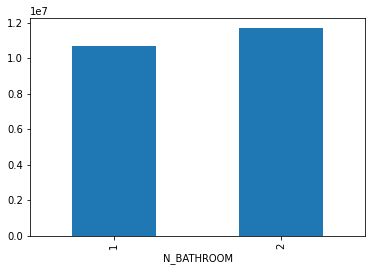

In [71]:
#let's is there any relationship btw number of bathrooms and sale price.
df.groupby('N_BATHROOM')['SALES_PRICE'].mean().sort_values(ascending=True).plot.bar()

#there is a slight linear relation btw number of bathrooms and sale price of the house.
#As th number of batrooms increases , then sale price of the house also increases.

#@ N_ROOMS COLUMN.

In [72]:
df['N_ROOM'].values

array([3, 5, 3, ..., 4, 2, 5])

In [73]:
df['N_ROOM'].isna().sum() #there are no null values.

0

In [74]:
df['N_ROOM'].value_counts()

4    2563
3    2125
5    1246
2     921
6     254
Name: N_ROOM, dtype: int64

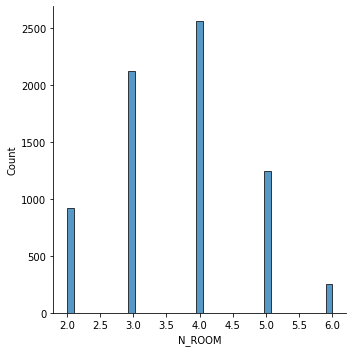

In [75]:
#ploting distribution of 'N_ROOM'
sns.displot(df['N_ROOM'])
plt.show()

#Most of the houses that we have are with 4 room , continued by 3,2,5,6.

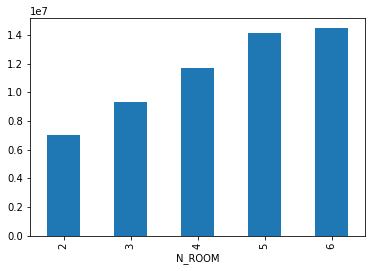

In [76]:
#let's the relation btw number of rooms and sale price.
df.groupby('N_ROOM')['SALES_PRICE'].mean().plot.bar()
 
#As the number of rooms is increasing sales price also increasing.

#@ sale condition column

In [77]:
df['SALE_COND'].values

array(['AbNormal', 'AbNormal', 'AbNormal', ..., 'Normal Sale', 'Partial',
       'Partial'], dtype=object)

In [78]:
df['SALE_COND'].unique()

array(['AbNormal', 'Family', 'Partial', 'AdjLand', 'Normal Sale',
       'Ab Normal', 'Partiall', 'Adj Land', 'PartiaLl'], dtype=object)

In [79]:
df['SALE_COND'] = df['SALE_COND'].replace({'AbNormal':'Ab Normal','Partiall':'Partial','AdjLand':'Adj Land','PartiaLl':'Partial'})

In [80]:
df['SALE_COND'].unique()

array(['Ab Normal', 'Family', 'Partial', 'Adj Land', 'Normal Sale'],
      dtype=object)

In [81]:
df['SALE_COND'].value_counts()

Adj Land       1439
Partial        1433
Normal Sale    1423
Ab Normal      1411
Family         1403
Name: SALE_COND, dtype: int64

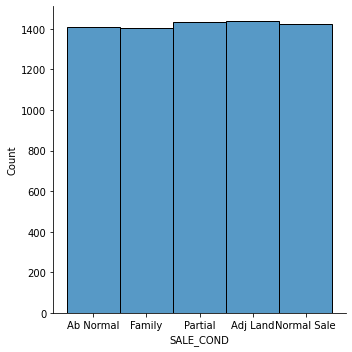

In [82]:
#distribution plot of sale conditon.
sns.displot(df['SALE_COND'])
plt.show()

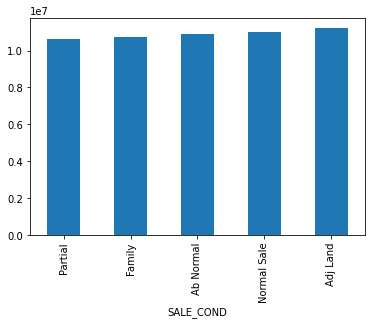

In [83]:
#Finding relation btw sale condition and sale price.
df.groupby('SALE_COND')['SALES_PRICE'].mean().sort_values(ascending=True).plot.bar()
#There is slight linear relation btw sale condition and sale price
#we need to do label encoding

In [84]:
#we are now encoding the sale condition column
#we encoding ['Partial':0,'Family':1,'Ab Normal':2,'Normal Sale':3,'Adj Land':4]
df['SALE_COND'] = df['SALE_COND'].replace({'Partial':0,'Family':1,'Ab Normal':2,'Normal Sale':3,'Adj Land':4})

In [85]:
# df.head()
# df.info()

#@ PARK_FACIL

In [86]:
#Parking facility is binary categorical column , we always do label encoding
df['PARK_FACIL'].value_counts()

Yes    3587
No     3520
Noo       2
Name: PARK_FACIL, dtype: int64

In [87]:
df['PARK_FACIL'] = df['PARK_FACIL'].replace({'Noo':0,'No':0,'Yes':1})

In [88]:
df['PARK_FACIL'].value_counts()

1    3587
0    3522
Name: PARK_FACIL, dtype: int64

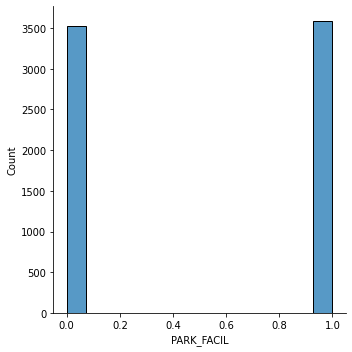

In [89]:
#Distribution plot
sns.displot(df['PARK_FACIL'])
plt.show()

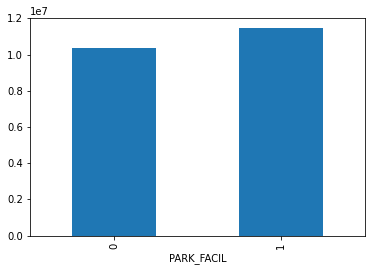

In [90]:
#finding relation between parking facility and sales price.
df.groupby('PARK_FACIL')['SALES_PRICE'].mean().sort_values().plot.bar()

#If there is parking facility then the AVG of sales price is more
#If there is no parking facility then AVG of sale sprice is less.
#lets keep it in the way it is.

#@ DATE_BUILD

In [91]:
df['DATE_BUILD'].isna().sum() #There are no null values in date build column.

0

In [92]:
df['DATE_BUILD'].dtype  #it is object datatype

dtype('O')

In [93]:
#changing form object datatype to datetime datatype.
df['DATE_BUILD'] = pd.to_datetime(df['DATE_BUILD'])

In [94]:
df['DATE_BUILD'].dtype 

dtype('<M8[ns]')

In [95]:
df['BUILD_YEAR'] = pd.DatetimeIndex(df['DATE_BUILD']).year

#@ Creating age of building

In [96]:
#creating a feature called "AGE" using build year and sale year
df['AGE'] = df['SALE_YEAR'] - df['BUILD_YEAR']

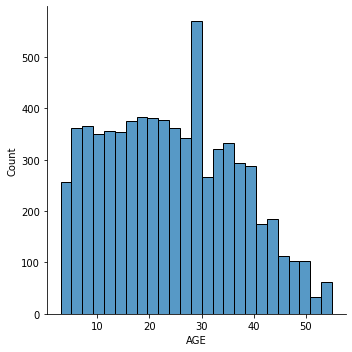

In [97]:
# df['AGE'].value_counts()
#Distribution plot
sns.displot(df['AGE'])
plt.show()
#The buildings with age nearer to 30 have sold more number of times

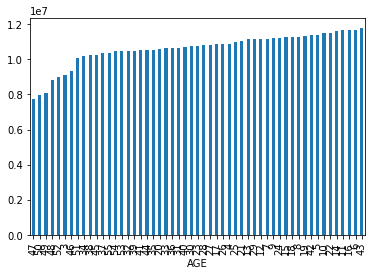

In [98]:
#finding relation between age of the building and sale price of the building.
df.groupby('AGE')['SALES_PRICE'].mean().sort_values().plot.bar()

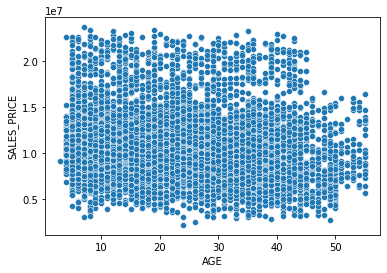

In [99]:
#sctter ploting the age and sales price.
sns.scatterplot(x = 'AGE',
                y = 'SALES_PRICE',
                data = df[['AGE','SALES_PRICE']])
#There is no clear result of this scatter plot

In [100]:
df['AGE'].describe()

count    7109.000000
mean       24.276270
std        12.334164
min         3.000000
25%        14.000000
50%        23.000000
75%        34.000000
max        55.000000
Name: AGE, dtype: float64

In [101]:
q3 = df['AGE'].quantile(0.75)
q1 = df['AGE'].quantile(0.25)
iqr = q3 -q1
iqr

20.0

In [102]:
q3 + 1.5*iqr  #There is no building with age is more than 64.0

64.0

In [103]:
q1 - 1.5*iqr  #There is no building with age less than -16.0

-16.0

In [104]:
# df.info()
#going to drop the columns ['SALE_YEAR','BUILD_YEAR','DATE_SALE','DATE_BUILD']
df = df.drop(columns=['SALE_YEAR','BUILD_YEAR','DATE_SALE','DATE_BUILD'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           7109 non-null   int64  
 1   INT_SQFT       7109 non-null   int64  
 2   DIST_MAINROAD  7109 non-null   int64  
 3   N_BEDROOM      7109 non-null   int64  
 4   N_BATHROOM     7109 non-null   int64  
 5   N_ROOM         7109 non-null   int64  
 6   SALE_COND      7109 non-null   int64  
 7   PARK_FACIL     7109 non-null   int64  
 8   BUILDTYPE      7109 non-null   object 
 9   UTILITY_AVAIL  7109 non-null   object 
 10  STREET         7109 non-null   object 
 11  MZZONE         7109 non-null   object 
 12  QS_ROOMS       7109 non-null   float64
 13  QS_BATHROOM    7109 non-null   float64
 14  QS_BEDROOM     7109 non-null   float64
 15  QS_OVERALL     7061 non-null   float64
 16  REG_FEE        7109 non-null   int64  
 17  COMMIS         7109 non-null   int64  
 18  SALES_PR

#@ Working on build type

In [105]:
df['BUILDTYPE'].values

array(['Commercial', 'Commercial', 'Commercial', ..., 'House',
       'Commercial', 'Others'], dtype=object)

In [106]:
df['BUILDTYPE'].unique()  #Basically there are only three types of build types.

array(['Commercial', 'Others', 'Other', 'House', 'Comercial'],
      dtype=object)

In [107]:
df['BUILDTYPE'] =df['BUILDTYPE'].replace({'Comercial':'Commercial','Others':'Other'})
df['BUILDTYPE'].unique()

array(['Commercial', 'Other', 'House'], dtype=object)

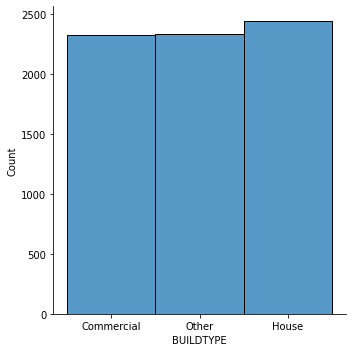

In [108]:
#ploting distribution plot
sns.displot(df['BUILDTYPE'])
plt.show()
#House type of buildings are sold more number of times.

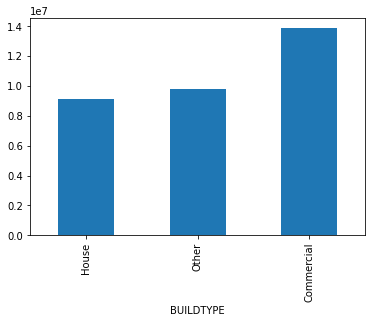

In [109]:
#finding a relation between building type and sales price.
df.groupby('BUILDTYPE')['SALES_PRICE'].mean().sort_values().plot.bar()
#There is no clear linear relationship between build type and sales price.
#we have to do one hot encoding.
#for one hot encoding pd.get_dummies(columns=['BUILDTYPE'])

#@ UTILITY_AVAIL

In [110]:
 df['UTILITY_AVAIL'].unique()

array(['AllPub', 'ELO', 'NoSewr ', 'NoSeWa', 'All Pub'], dtype=object)

In [111]:
df['UTILITY_AVAIL'].isna().sum() #There are no null values in utility available column.

0

In [112]:
#replacing miss spelled values in the column
df['UTILITY_AVAIL'] = df['UTILITY_AVAIL'].replace({'All Pub':'AllPub','NoSewr ':'NoSewr'})
df['UTILITY_AVAIL'].unique()

array(['AllPub', 'ELO', 'NoSewr', 'NoSeWa'], dtype=object)

In [113]:
df['UTILITY_AVAIL'].value_counts()

AllPub    1887
NoSeWa    1871
NoSewr    1829
ELO       1522
Name: UTILITY_AVAIL, dtype: int64

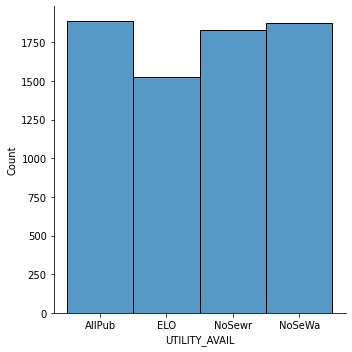

In [114]:
#distribution plotting
sns.displot(df['UTILITY_AVAIL'])
plt.show()

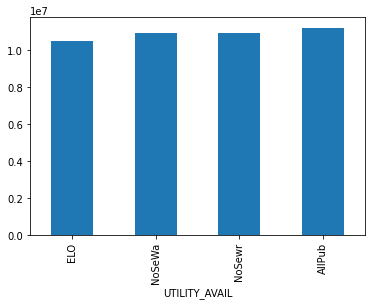

In [115]:
df.groupby('UTILITY_AVAIL')['SALES_PRICE'].mean().sort_values().plot.bar()
#There is a clear linear relationship between utility availabel and sales price.
#we can do label encoding.

In [116]:
df['UTILITY_AVAIL'] = df['UTILITY_AVAIL'].replace({'ELO':0,'NoSeWa':1,'NoSewr':2,'AllPub':3})

In [117]:
df['UTILITY_AVAIL'].value_counts()

3    1887
1    1871
2    1829
0    1522
Name: UTILITY_AVAIL, dtype: int64

In [118]:
# #scatter ploting
# sns.scatterplot(x = 'UTILITY_AVAIL',
#                 y = 'SALES_PRICE',
#                 data = df[['UTILITY_AVAIL','SALES_PRICE']])


In [119]:
df.describe()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,UTILITY_AVAIL,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE,AGE
count,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7061.000000,7109.000000,7109.000000,7.109000e+03,7109.000000
mean,2.539738,1382.073006,99.603179,1.636939,1.213110,3.688704,2.004501,0.504572,1.574061,3.517471,3.507244,3.485300,3.503254,376938.330708,141005.726544,1.089491e+07,24.276270
std,1.846837,457.410902,57.403110,0.802881,0.409534,1.019099,1.419073,0.500014,1.097156,0.891972,0.897834,0.887266,0.527223,143070.662010,78768.093718,3.768603e+06,12.334164
min,0.000000,500.000000,0.000000,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000,2.000000,2.000000,2.000000,2.000000,71177.000000,5055.000000,2.156875e+06,3.000000
25%,1.000000,993.000000,50.000000,1.000000,1.000000,3.000000,1.000000,0.000000,1.000000,2.700000,2.700000,2.700000,3.130000,272406.000000,84219.000000,8.272100e+06,14.000000
50%,2.000000,1373.000000,99.000000,1.000000,1.000000,4.000000,2.000000,1.000000,2.000000,3.500000,3.500000,3.500000,3.500000,349486.000000,127628.000000,1.033505e+07,23.000000
75%,4.000000,1744.000000,148.000000,2.000000,1.000000,4.000000,3.000000,1.000000,3.000000,4.300000,4.300000,4.300000,3.890000,451562.000000,184506.000000,1.299390e+07,34.000000
max,6.000000,2500.000000,200.000000,4.000000,2.000000,6.000000,4.000000,1.000000,3.000000,5.000000,5.000000,5.000000,4.970000,983922.000000,495405.000000,2.366734e+07,55.000000


In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           7109 non-null   int64  
 1   INT_SQFT       7109 non-null   int64  
 2   DIST_MAINROAD  7109 non-null   int64  
 3   N_BEDROOM      7109 non-null   int64  
 4   N_BATHROOM     7109 non-null   int64  
 5   N_ROOM         7109 non-null   int64  
 6   SALE_COND      7109 non-null   int64  
 7   PARK_FACIL     7109 non-null   int64  
 8   BUILDTYPE      7109 non-null   object 
 9   UTILITY_AVAIL  7109 non-null   int64  
 10  STREET         7109 non-null   object 
 11  MZZONE         7109 non-null   object 
 12  QS_ROOMS       7109 non-null   float64
 13  QS_BATHROOM    7109 non-null   float64
 14  QS_BEDROOM     7109 non-null   float64
 15  QS_OVERALL     7061 non-null   float64
 16  REG_FEE        7109 non-null   int64  
 17  COMMIS         7109 non-null   int64  
 18  SALES_PR

#@ STREET column

In [121]:
df['STREET'].values

array(['Paved', 'Gravel', 'Gravel', ..., 'Gravel', 'Paved', 'Paved'],
      dtype=object)

In [122]:
df['STREET'].unique()

array(['Paved', 'Gravel', 'No Access', 'Pavd', 'NoAccess'], dtype=object)

In [123]:
df['STREET'] = df['STREET'].replace({'Pavd':'Paved','No Access':'NoAccess'})

In [124]:
df['STREET'].value_counts()

Paved       2572
Gravel      2520
NoAccess    2017
Name: STREET, dtype: int64

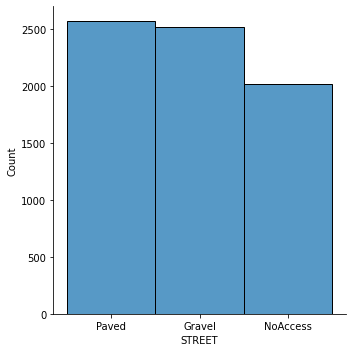

In [125]:
#distribution plot
sns.displot(df['STREET'])
plt.show()
# Paved street are sold more number of times.

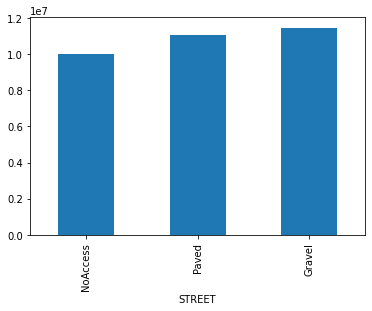

In [126]:
#finding relation between street type and sales price.
df.groupby('STREET')['SALES_PRICE'].mean().sort_values().plot.bar()
#There is a linear relation between street type and sales price
#We can label encode them

In [127]:
df['STREET'] = df['STREET'].replace({'NoAccess':0,'Paved':1,'Gravel':2})

In [128]:
df['STREET'].value_counts()

1    2572
2    2520
0    2017
Name: STREET, dtype: int64

#@ MZZONE column

In [129]:
df['MZZONE'].values

array(['A', 'RH', 'RL', ..., 'I', 'RL', 'I'], dtype=object)

In [130]:
df['MZZONE'].unique()

array(['A', 'RH', 'RL', 'I', 'C', 'RM'], dtype=object)

In [131]:
df['MZZONE'].isna().sum() #There are null values in 'MZZONE' column.

0

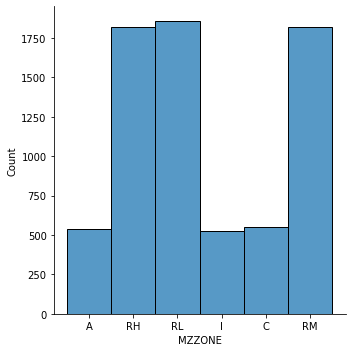

In [132]:
#distribution plot
sns.displot(df['MZZONE'])
plt.show()

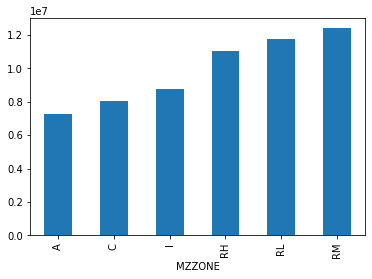

In [133]:
#Finding relationship between 'MZZONE' and sales price of the building.
df.groupby('MZZONE')['SALES_PRICE'].mean().sort_values().plot.bar()

#There is a linear relationship between 'MZZONE' and sales price of the building
#we can label encode this column

In [134]:
df['MZZONE'] = df['MZZONE'].replace({'A':0,'C':1,'I':2,'RH':3,'RL':4,'RM':5})

In [135]:
df['MZZONE'].value_counts()

4    1858
3    1822
5    1817
1     550
0     537
2     525
Name: MZZONE, dtype: int64

#@ QS_ROOMS column

In [136]:
df['QS_ROOMS'].values

array([4. , 4.9, 4.1, ..., 4.3, 4.6, 3.1])

In [137]:
df['QS_ROOMS'].isna().sum() #There is no null in this column.

0

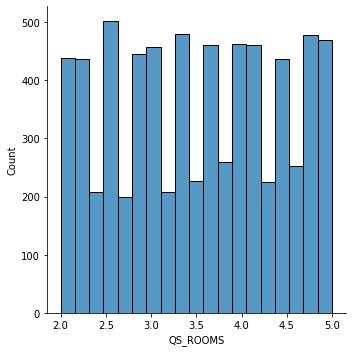

In [138]:
#distribution plot
sns.displot(df['QS_ROOMS'])
plt.show()

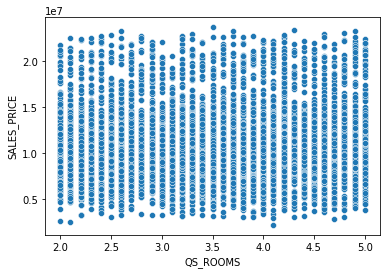

In [139]:
sns.scatterplot(x = 'QS_ROOMS',
                y = 'SALES_PRICE',
                data = df[['QS_ROOMS','SALES_PRICE']])


In [140]:
#Finding if there is a correlation between 'QS_ROOMS' and sales price.
df[['QS_ROOMS','SALES_PRICE']].corr()

,QS_ROOMS,SALES_PRICE
QS_ROOMS,1.000000,0.021967
SALES_PRICE,0.021967,1.000000


In [141]:
df['QS_BATHROOM'].values

array([3.9, 4.2, 3.8, ..., 4.2, 3.8, 3.5])

In [142]:
df['QS_BATHROOM'].isna().sum() #There are no null values in these column.

0

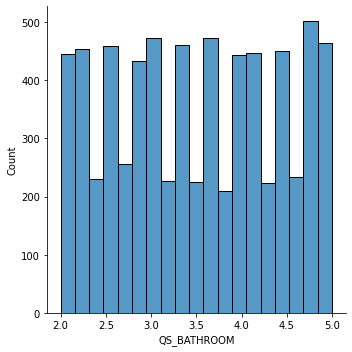

In [143]:
#distribution plot
sns.displot(df['QS_BATHROOM'])
plt.show()

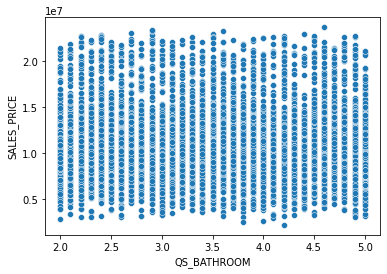

In [144]:
sns.scatterplot(x = 'QS_BATHROOM',
                y = 'SALES_PRICE',
                data = df[['QS_BATHROOM','SALES_PRICE']])

In [145]:
df[['QS_BATHROOM','SALES_PRICE']].corr()

,QS_BATHROOM,SALES_PRICE
QS_BATHROOM,1.000000,-0.011377
SALES_PRICE,-0.011377,1.000000


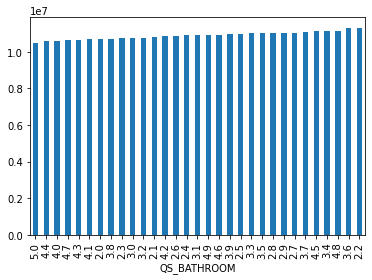

In [146]:
df.groupby('QS_BATHROOM')['SALES_PRICE'].mean().sort_values().plot.bar()

In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           7109 non-null   int64  
 1   INT_SQFT       7109 non-null   int64  
 2   DIST_MAINROAD  7109 non-null   int64  
 3   N_BEDROOM      7109 non-null   int64  
 4   N_BATHROOM     7109 non-null   int64  
 5   N_ROOM         7109 non-null   int64  
 6   SALE_COND      7109 non-null   int64  
 7   PARK_FACIL     7109 non-null   int64  
 8   BUILDTYPE      7109 non-null   object 
 9   UTILITY_AVAIL  7109 non-null   int64  
 10  STREET         7109 non-null   int64  
 11  MZZONE         7109 non-null   int64  
 12  QS_ROOMS       7109 non-null   float64
 13  QS_BATHROOM    7109 non-null   float64
 14  QS_BEDROOM     7109 non-null   float64
 15  QS_OVERALL     7061 non-null   float64
 16  REG_FEE        7109 non-null   int64  
 17  COMMIS         7109 non-null   int64  
 18  SALES_PR

#@ Model buiilding

In [148]:
df.drop(['DIST_MAINROAD','COMMIS','REG_FEE','QS_ROOMS','QS_BATHROOM','QS_BEDROOM','QS_OVERALL'],axis = 1,inplace= True) 
df.info()   
#dropped 'COMMIS','REG_FEE' because they are directly linked to price of the building ,but not a separate feature which affect the price of the building.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   AREA           7109 non-null   int64 
 1   INT_SQFT       7109 non-null   int64 
 2   N_BEDROOM      7109 non-null   int64 
 3   N_BATHROOM     7109 non-null   int64 
 4   N_ROOM         7109 non-null   int64 
 5   SALE_COND      7109 non-null   int64 
 6   PARK_FACIL     7109 non-null   int64 
 7   BUILDTYPE      7109 non-null   object
 8   UTILITY_AVAIL  7109 non-null   int64 
 9   STREET         7109 non-null   int64 
 10  MZZONE         7109 non-null   int64 
 11  SALES_PRICE    7109 non-null   int64 
 12  AGE            7109 non-null   int64 
dtypes: int64(12), object(1)
memory usage: 722.1+ KB


In [149]:
dfb = pd.get_dummies(df['BUILDTYPE'])
dfb

,Commercial,House,Other
0,1,0,0
1,1,0,0
2,1,0,0
3,0,0,1
4,0,0,1
...,...,...,...
7104,0,0,1
7105,0,0,1
7106,0,1,0
7107,1,0,0


In [150]:
dfn = pd.concat([df,dfb],axis = 1,join='inner')
dfn.head()

,AREA,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,SALES_PRICE,AGE,Commercial,House,Other
0,0,1004,1,1,3,2,1,Commercial,3,1,0,7600000,44,1,0,0
1,5,1986,2,1,5,2,0,Commercial,3,2,3,21717770,11,1,0,0
2,1,909,1,1,3,2,1,Commercial,0,2,4,13159200,20,1,0,0
3,3,1855,3,2,5,1,0,Other,2,1,2,9630290,22,0,0,1
4,0,1226,1,1,3,2,1,Other,3,2,1,7406250,30,0,0,1


In [151]:
dfn.drop('BUILDTYPE',axis = 1,inplace = True)
dfn.head()

,AREA,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,UTILITY_AVAIL,STREET,MZZONE,SALES_PRICE,AGE,Commercial,House,Other
0,0,1004,1,1,3,2,1,3,1,0,7600000,44,1,0,0
1,5,1986,2,1,5,2,0,3,2,3,21717770,11,1,0,0
2,1,909,1,1,3,2,1,0,2,4,13159200,20,1,0,0
3,3,1855,3,2,5,1,0,2,1,2,9630290,22,0,0,1
4,0,1226,1,1,3,2,1,3,2,1,7406250,30,0,0,1


splitting dataset into train and test

In [152]:
x = dfn[['AREA','INT_SQFT','N_BEDROOM','N_BATHROOM','N_ROOM','SALE_COND','PARK_FACIL','UTILITY_AVAIL','STREET','MZZONE','AGE','Commercial','House','Other']].values
y = dfn['SALES_PRICE'].values

In [153]:
from sklearn.model_selection import train_test_split

In [154]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

linear regression

In [155]:
# from sklearn.preprocessing import StandardScaler ## standrard scalig 
# scaler = StandardScaler() #initialise to a variable
# scaler.fit(x_train,y_train) # we are finding the values of mean and sd from the td
# x_train_scaled = scaler.transform(x_train) # fit (mean, sd) and then transform the training data
# x_test_scaled = scaler.transform(x_test) # transform the test data 

In [156]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [157]:
y_pred = regressor.predict(x_test)

In [158]:
from sklearn.metrics import r2_score

In [159]:
#checking R2 -- score.
print('R2- SCORE:',r2_score(y_test,y_pred))  



R2- SCORE: 0.9222271182054964


grabbing important features.

In [160]:
# !pip install scikit-learn==0.24.2

In [161]:
from sklearn.feature_selection import SequentialFeatureSelector
estimator = LinearRegression()
sfs = SequentialFeatureSelector(estimator)
sfs.fit(x_train, y_train)
print(list(zip(['AREA','INT_SQFT','N_BEDROOM','N_BATHROOM','N_ROOM','SALE_COND','PARK_FACIL','UTILITY_AVAIL','STREET','MZZONE','AGE','Commercial','House','Other'],sfs.get_support())))

[('AREA', True), ('INT_SQFT', False), ('N_BEDROOM', True), ('N_BATHROOM', False), ('N_ROOM', True), ('SALE_COND', False), ('PARK_FACIL', True), ('UTILITY_AVAIL', False), ('STREET', True), ('MZZONE', True), ('AGE', False), ('Commercial', True), ('House', False), ('Other', False)]


In [162]:
m = list(zip(['AREA','INT_SQFT','N_BEDROOM','N_BATHROOM','N_ROOM','SALE_COND','PARK_FACIL','UTILITY_AVAIL','STREET','MZZONE','AGE','Commercial','House','Other'],sfs.get_support()))

In [163]:
imp_l = []
for i in m:
  if i[1] == True:
    imp_l.append(i[0])

In [164]:
print(*imp_l ,sep=', ')

AREA, N_BEDROOM, N_ROOM, PARK_FACIL, STREET, MZZONE, Commercial


In [165]:
"""
WE GOT 7 FEATURES AS IMPORTANAT FEATURES TO PREDICT SALES PRICE OF THE BUILDING.
"""

'\nWE GOT 7 FEATURES AS IMPORTANAT FEATURES TO PREDICT SALES PRICE OF THE BUILDING.\n'

In [166]:
imp_ft = dfn[imp_l].values

In [167]:
imp_ft_train, imp_ft_test, y_train, y_test = train_test_split(imp_ft,y,test_size = 0.25)

In [168]:
regressor = LinearRegression()
regressor.fit(imp_ft_train, y_train)
y_pred = regressor.predict(imp_ft_test)

In [169]:
#checking R2 -- score.
print('R2- SCORE:',r2_score(y_test,y_pred))

R2- SCORE: 0.9077833547029235


USING KNN model for regression

In [170]:
x = dfn[['AREA','INT_SQFT','N_BEDROOM','N_BATHROOM','N_ROOM','SALE_COND','PARK_FACIL','UTILITY_AVAIL','STREET','MZZONE','AGE','Commercial','House','Other']].values
y = dfn['SALES_PRICE'].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [171]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score

In [172]:
for i in [1,2,3,4,5,6,7,8,9,10,20,30]:
  knn = KNeighborsRegressor(i)
  knn.fit(x_train,y_train)
  print("K value: ",i,"Train accuracy: ",knn.score(x_train,y_train),"val accuracy: ",np.mean(cross_val_score(knn,x_train,y_train,cv = 10,scoring='r2')))

K value:  1 Train accuracy:  1.0 val accuracy:  0.11291735350831131
K value:  2 Train accuracy:  0.7796961626491695 val accuracy:  0.3180433946006678
K value:  3 Train accuracy:  0.6992384910820086 val accuracy:  0.3759633926542685
K value:  4 Train accuracy:  0.6516368123638008 val accuracy:  0.3936180845302091
K value:  5 Train accuracy:  0.6167497000462105 val accuracy:  0.3994148424590315
K value:  6 Train accuracy:  0.5930944113198735 val accuracy:  0.40367067395337397
K value:  7 Train accuracy:  0.5703694904276801 val accuracy:  0.4078682266758619
K value:  8 Train accuracy:  0.5538784760446589 val accuracy:  0.4109642774921515
K value:  9 Train accuracy:  0.5383660492605444 val accuracy:  0.41446156123355793
K value:  10 Train accuracy:  0.5302979996554564 val accuracy:  0.41425853197664464
K value:  20 Train accuracy:  0.48320052011646275 val accuracy:  0.4191174929384949
K value:  30 Train accuracy:  0.4626673183397527 val accuracy:  0.4190686571693868


In [173]:
knn = KNeighborsRegressor(10)
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)

In [174]:
"""
CHECKING R2--SCORE FOR KNN N=10
"""
#checking R2 -- score.
print('R2- SCORE:',r2_score(y_test,y_pred))

R2- SCORE: 0.42566600211887695


In [175]:
"""
Finding important features
"""
estimator = KNeighborsRegressor()
sfs = SequentialFeatureSelector(estimator)
sfs.fit(x_train, y_train)
print(list(zip(['AREA','INT_SQFT','N_BEDROOM','N_BATHROOM','N_ROOM','SALE_COND','PARK_FACIL','UTILITY_AVAIL','STREET','MZZONE','AGE','Commercial','House','Other'],sfs.get_support())))
m = list(zip(['AREA','INT_SQFT','N_BEDROOM','N_BATHROOM','N_ROOM','SALE_COND','PARK_FACIL','UTILITY_AVAIL','STREET','MZZONE','AGE','Commercial','House','Other'],sfs.get_support()))


[('AREA', True), ('INT_SQFT', False), ('N_BEDROOM', False), ('N_BATHROOM', False), ('N_ROOM', True), ('SALE_COND', False), ('PARK_FACIL', True), ('UTILITY_AVAIL', False), ('STREET', False), ('MZZONE', True), ('AGE', False), ('Commercial', True), ('House', True), ('Other', True)]


In [176]:
imp_l = []
for i in m:
  if i[1] == True:
    imp_l.append(i[0])

In [177]:
print(*imp_l , sep=', ')

AREA, N_ROOM, PARK_FACIL, MZZONE, Commercial, House, Other


In [178]:
imp_ft = dfn[imp_l].values
imp_ft_train, imp_ft_test, y_train, y_test = train_test_split(imp_ft,y,test_size = 0.25)


In [179]:
for i in [1,2,3,4,5,6,7,8,9,10,20,30]:
  knn = KNeighborsRegressor(i)
  knn.fit(imp_ft_train,y_train)
  print("K value: ",i,"Train accuracy: ",knn.score(imp_ft_train,y_train),"val accuracy: ",np.mean(cross_val_score(knn,x_train,y_train,cv = 10,scoring='r2')))

K value:  1 Train accuracy:  0.9312054643776928 val accuracy:  -1.014745203541698
K value:  2 Train accuracy:  0.9532709051710416 val accuracy:  -0.5135489811490168
K value:  3 Train accuracy:  0.956757169908122 val accuracy:  -0.35822034433050864
K value:  4 Train accuracy:  0.9598447470180856 val accuracy:  -0.28364724150177284
K value:  5 Train accuracy:  0.9617881206026656 val accuracy:  -0.2274583172498744
K value:  6 Train accuracy:  0.9621181822505245 val accuracy:  -0.18829416035459523
K value:  7 Train accuracy:  0.9629057048950724 val accuracy:  -0.1621321651885726
K value:  8 Train accuracy:  0.963142123743069 val accuracy:  -0.1320844259203677
K value:  9 Train accuracy:  0.9631489604796326 val accuracy:  -0.11560135946485148
K value:  10 Train accuracy:  0.9628600344320511 val accuracy:  -0.10555979754761438
K value:  20 Train accuracy:  0.9576829436975186 val accuracy:  -0.04825922187643674
K value:  30 Train accuracy:  0.9545233034447042 val accuracy:  -0.039966239540284

In [180]:
"""
KNN model is no performing well no this data set.
"""

'\nKNN model is no performing well no this data set.\n'

DECISION TREE REGRESSION MODEL

In [181]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer

In [182]:
x = dfn[['AREA','INT_SQFT','N_BEDROOM','N_BATHROOM','N_ROOM','SALE_COND','PARK_FACIL','UTILITY_AVAIL','STREET','MZZONE','AGE','Commercial','House','Other']].values
y = dfn['SALES_PRICE'].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)


In [183]:
for depth in [1,2,3,4,5,6,7,8,9,10,20,30,40,50,60,70,80,90,100]:
  dt = DecisionTreeRegressor(max_depth=depth)
  dt.fit(x_train,y_train)
  valAccuracy = cross_val_score(dt,x_train,y_train,cv=10,scoring= make_scorer(r2_score))
  print('for depth: ',depth,'score: ',np.mean(valAccuracy))

for depth:  1 score:  0.3658061109430658
for depth:  2 score:  0.6856959213803193
for depth:  3 score:  0.8042176397590396
for depth:  4 score:  0.8821689799168787
for depth:  5 score:  0.9156969325743123
for depth:  6 score:  0.9357571490693382
for depth:  7 score:  0.9493231016503639
for depth:  8 score:  0.9592027733089401
for depth:  9 score:  0.9654010746056485
for depth:  10 score:  0.9692352601610665
for depth:  20 score:  0.9722206121665385
for depth:  30 score:  0.9719862171030373
for depth:  40 score:  0.9718507927275276
for depth:  50 score:  0.97149711775691
for depth:  60 score:  0.972192232957927
for depth:  70 score:  0.9718291713326215
for depth:  80 score:  0.9717211581681122
for depth:  90 score:  0.971949249227888
for depth:  100 score:  0.972192485719139


In [184]:
"""
Finding important features
"""
#let's take max_depth=20
estimator = DecisionTreeRegressor(max_depth=20)
sfs = SequentialFeatureSelector(estimator)
sfs.fit(x_train, y_train)
print(list(zip(['AREA','INT_SQFT','N_BEDROOM','N_BATHROOM','N_ROOM','SALE_COND','PARK_FACIL','UTILITY_AVAIL','STREET','MZZONE','AGE','Commercial','House','Other'],sfs.get_support())))
m = list(zip(['AREA','INT_SQFT','N_BEDROOM','N_BATHROOM','N_ROOM','SALE_COND','PARK_FACIL','UTILITY_AVAIL','STREET','MZZONE','AGE','Commercial','House','Other'],sfs.get_support()))


[('AREA', True), ('INT_SQFT', False), ('N_BEDROOM', False), ('N_BATHROOM', False), ('N_ROOM', True), ('SALE_COND', False), ('PARK_FACIL', True), ('UTILITY_AVAIL', False), ('STREET', True), ('MZZONE', True), ('AGE', False), ('Commercial', True), ('House', True), ('Other', False)]


In [185]:
imp_l = []
for i in m:
  if i[1] == True:
    imp_l.append(i[0])

In [186]:
print(*imp_l , sep=', ')

AREA, N_ROOM, PARK_FACIL, STREET, MZZONE, Commercial, House


In [187]:
imp_ft = dfn[imp_l].values
imp_ft_train, imp_ft_test, y_train, y_test = train_test_split(imp_ft,y,test_size = 0.25)


In [188]:
for depth in [1,2,3,4,5,6,7,8,9,10,20,30,40,50,60]:
  dt = DecisionTreeRegressor(max_depth=depth)
  dt.fit(imp_ft_train,y_train)
  valAccuracy = cross_val_score(dt,imp_ft_train,y_train,cv=10,scoring= make_scorer(r2_score))
  print('for depth: ',depth,'score: ',np.mean(valAccuracy))

for depth:  1 score:  0.36187611367069183
for depth:  2 score:  0.6880165428245236
for depth:  3 score:  0.8056579440589198
for depth:  4 score:  0.8700628862121631
for depth:  5 score:  0.9098901533168025
for depth:  6 score:  0.9304265993212045
for depth:  7 score:  0.944471405534245
for depth:  8 score:  0.9564074843239526
for depth:  9 score:  0.9640513851148167
for depth:  10 score:  0.9676067745970087
for depth:  20 score:  0.9698934479518456
for depth:  30 score:  0.969883727898514
for depth:  40 score:  0.9699053886004092
for depth:  50 score:  0.9699271534306849
for depth:  60 score:  0.9698755739232615


In [189]:
dt = DecisionTreeRegressor(max_depth=20)
dt.fit(imp_ft_train,y_train)
y_pred = dt.predict(imp_ft_test)

In [190]:
"""
CHECKING R2--SCORE FOR DecisionTreeRegressor max_depth=20
"""
#checking R2 -- score.
print('R2- SCORE:',r2_score(y_test,y_pred))

R2- SCORE: 0.9690197110530763


In [191]:
"""
WE GOT GOOD R2 -- SCORE FOR DECISION TREE REGRESSOR MODEL. HERE THE SCORE IS 97%
"""

'\nWE GOT GOOD R2 -- SCORE FOR DECISION TREE REGRESSOR MODEL. HERE THE SCORE IS 97%\n'

Random Forest Model.

In [192]:
x = dfn[['AREA','INT_SQFT','N_BEDROOM','N_BATHROOM','N_ROOM','SALE_COND','PARK_FACIL','UTILITY_AVAIL','STREET','MZZONE','AGE','Commercial','House','Other']].values
y = dfn['SALES_PRICE'].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)


In [193]:
from sklearn.ensemble import RandomForestRegressor

In [194]:
#Here we are taking max_depth = 20 because we got good result in decision tree model with the same depth.
rf = RandomForestRegressor(n_estimators= 100, max_depth = 20, max_features='sqrt')
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
r2_score(y_pred,y_test)

0.9863858661586637

In [195]:
"""
Finding important features
"""
#let's take max_depth=20
estimator = RandomForestRegressor(max_depth=20)
sfs = SequentialFeatureSelector(estimator)
sfs.fit(x_train, y_train)
print(list(zip(['AREA','INT_SQFT','N_BEDROOM','N_BATHROOM','N_ROOM','SALE_COND','PARK_FACIL','UTILITY_AVAIL','STREET','MZZONE','AGE','Commercial','House','Other'],sfs.get_support())))
m = list(zip(['AREA','INT_SQFT','N_BEDROOM','N_BATHROOM','N_ROOM','SALE_COND','PARK_FACIL','UTILITY_AVAIL','STREET','MZZONE','AGE','Commercial','House','Other'],sfs.get_support()))


[('AREA', True), ('INT_SQFT', True), ('N_BEDROOM', False), ('N_BATHROOM', False), ('N_ROOM', True), ('SALE_COND', False), ('PARK_FACIL', True), ('UTILITY_AVAIL', False), ('STREET', True), ('MZZONE', True), ('AGE', False), ('Commercial', True), ('House', False), ('Other', False)]


In [196]:
imp_l = []
for i in m:
  if i[1] == True:
    imp_l.append(i[0])
print(*imp_l , sep=', ')
#Here we got AREA, INT_SQFT, N_ROOM, PARK_FACIL, STREET, MZZONE, Commercial as import feature that are affecting the sales price of the house.

AREA, INT_SQFT, N_ROOM, PARK_FACIL, STREET, MZZONE, Commercial


In [197]:
imp_ft = dfn[imp_l].values
imp_ft_train, imp_ft_test, y_train, y_test = train_test_split(imp_ft,y,test_size = 0.25)


In [198]:
rf = RandomForestRegressor(n_estimators= 100, max_depth = 20, max_features='sqrt')
rf.fit(imp_ft_train,y_train)
y_pred = rf.predict(imp_ft_test)


In [199]:
#checking R2 -- score.
print('R2- SCORE:',r2_score(y_test,y_pred))
#we got score of 97.7%

R2- SCORE: 0.9792488549121766


XG boost

In [200]:
x = dfn[['AREA','INT_SQFT','N_BEDROOM','N_BATHROOM','N_ROOM','SALE_COND','PARK_FACIL','UTILITY_AVAIL','STREET','MZZONE','AGE','Commercial','House','Other']].values
y = dfn['SALES_PRICE'].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)


In [201]:
import warnings
warnings.filterwarnings('ignore')

In [202]:
import xgboost as xgb

In [203]:
for lr in [0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.11,0.12,0.13,0.14,0.15,0.2,0.5,0.7,1]:
  model = xgb.XGBRegressor(learning_rate = lr, n_estimators=100, verbosity = 0) # initialise the model
  model.fit(x_train,y_train) #train the model
  model.score(x_test, y_test)
  print("Learning rate : ", lr, " Train score : ", model.score(x_train,y_train), " Cross-Val score : ", np.mean(cross_val_score(model, x_train, y_train, cv=10)))

Learning rate :  0.01  Train score :  -0.37143662132305066  Cross-Val score :  -0.3834686673293878
Learning rate :  0.02  Train score :  0.7476010419832536  Cross-Val score :  0.7426193389196054
Learning rate :  0.03  Train score :  0.9245923754280599  Cross-Val score :  0.9213625305280972
Learning rate :  0.04  Train score :  0.9619332569909729  Cross-Val score :  0.9587441650063685
Learning rate :  0.05  Train score :  0.9740736564229245  Cross-Val score :  0.9714003622309706
Learning rate :  0.06  Train score :  0.9800114832146462  Cross-Val score :  0.9778658926359821
Learning rate :  0.07  Train score :  0.9848723580062  Cross-Val score :  0.9825377420898205
Learning rate :  0.08  Train score :  0.9878803088188661  Cross-Val score :  0.9855870641027173
Learning rate :  0.09  Train score :  0.990180735862099  Cross-Val score :  0.9883864995051305
Learning rate :  0.1  Train score :  0.9917112945335054  Cross-Val score :  0.9898893724132621
Learning rate :  0.11  Train score :  0.99

In [204]:
model = xgb.XGBRegressor(learning_rate = 0.7, n_estimators=100, verbosity=0)
model.fit(x_train,y_train) #train the model
y_pred = model.predict(x_test)

In [205]:
#checking R2 -- score.
print('R2- SCORE:',r2_score(y_test,y_pred))

#we got a R2 -- score of 99.7% prediction rate.

R2- SCORE: 0.996954949565126


In [206]:
"""
Finding important features
"""
#let's take learning rate lr=0.7
estimator = xgb.XGBRegressor(learning_rate = 0.7, n_estimators=100 , verbosity=0)
sfs = SequentialFeatureSelector(estimator)
sfs.fit(x_train, y_train)
# print(list(zip(['AREA','INT_SQFT','N_BEDROOM','N_BATHROOM','N_ROOM','SALE_COND','PARK_FACIL','UTILITY_AVAIL','STREET','MZZONE','AGE','Commercial','House','Other'],sfs.get_support())))
m = list(zip(['AREA','INT_SQFT','N_BEDROOM','N_BATHROOM','N_ROOM','SALE_COND','PARK_FACIL','UTILITY_AVAIL','STREET','MZZONE','AGE','Commercial','House','Other'],sfs.get_support()))


In [207]:
imp_l = []
for i in m:
  if i[1] == True:
    imp_l.append(i[0])
print(*imp_l , sep=', ')

#The import features are AREA, INT_SQFT, PARK_FACIL, STREET, MZZONE, Commercial, Other

AREA, INT_SQFT, PARK_FACIL, STREET, MZZONE, Commercial, House


In [208]:
imp_ft = dfn[imp_l].values
imp_ft_train, imp_ft_test, y_train, y_test = train_test_split(imp_ft,y,test_size = 0.25)


In [209]:
for lr in [0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.11,0.12,0.13,0.14,0.15,0.2,0.5,0.7,0.8,0.9,1]:
  model = xgb.XGBRegressor(learning_rate = lr, n_estimators=100, verbosity = 0) # initialise the model
  model.fit(imp_ft_train,y_train) #train the model
  model.score(imp_ft_test, y_test)
  print("Learning rate : ", lr, " Train score : ", model.score(imp_ft_train,y_train), " Cross-Val score : ", np.mean(cross_val_score(model, imp_ft_train, y_train, cv=10)))

Learning rate :  0.01  Train score :  -0.377329625035433  Cross-Val score :  -0.3851233742338545
Learning rate :  0.02  Train score :  0.7460669377410503  Cross-Val score :  0.7424896653982593
Learning rate :  0.03  Train score :  0.9238909682083188  Cross-Val score :  0.9210967669561752
Learning rate :  0.04  Train score :  0.9614023818559941  Cross-Val score :  0.9587994704894343
Learning rate :  0.05  Train score :  0.9732080003353658  Cross-Val score :  0.9707807425927719
Learning rate :  0.06  Train score :  0.9777884944877301  Cross-Val score :  0.9764429076049546
Learning rate :  0.07  Train score :  0.9825969402570677  Cross-Val score :  0.9804789560168142
Learning rate :  0.08  Train score :  0.9851069821752404  Cross-Val score :  0.9829624418136834
Learning rate :  0.09  Train score :  0.9870642198235147  Cross-Val score :  0.9850716214622993
Learning rate :  0.1  Train score :  0.9883470970193999  Cross-Val score :  0.9863407962033974
Learning rate :  0.11  Train score :  0.

In [210]:
model = xgb.XGBRegressor(learning_rate = 0.7, n_estimators=100, verbosity=0)
model.fit(imp_ft_train,y_train) #train the model
y_pred = model.predict(imp_ft_test)

In [211]:
#checking R2 -- score.
print('R2- SCORE:',r2_score(y_test,y_pred))


#R2 -- score is 99.06% it is a good r2 --score for regression prediction model.

R2- SCORE: 0.989867371239914


In [212]:
"""
XG BOOST IS THE BEST MODEL FOR THIS DATA SET WITH GREATER R2 -- SCORE AS COMPARED TO OTHER MODELS.
"""

'\nXG BOOST IS THE BEST MODEL FOR THIS DATA SET WITH GREATER R2 -- SCORE AS COMPARED TO OTHER MODELS.\n'